# Практична робота 1 #  
## Завдання ##

**1.** Відповідно до вашого варіанту опишіть можливі три бізнес-цілі, цілі моделювання та критерії успіху до них відповідно. Для цього завдання візьміть до уваги лише пункт «Ваш клієнт».

**2.** Ознайомившись із пунктом «Запит клієнта» додайте до попередніх цілей задану та сформулюйте цілі моделювання і критерії успіху.

**3.** Проведіть аналіз даних вашого підприємства (файл «train.csv») та сформуйте звіт про дослідження даних та звіт про якість даних.
Приклади функцій, що використовуються для аналізу даних ви можете знайти у файлі example.ipynb Для проведення аналізу необхідно встановити python3 та jupyter notebook (послідовність дій вказана у файлі Встановлення python)

**4.** Наведіть приклади цікавих, на вашу думку, фактів з аналізу даних. 

## Варіант 6 ##

**Опис компанії замовника:** HSBC Holdings plc: Міжнародний банківський конгломерат, який активно використовує цифровий маркетинг та персоналізовані кампанії для просування своїх продуктів.

**Запит:** Банк шукає способи для підвищення результативності своїх маркетингових кампаній, зокрема в контексті залучення клієнтів до нових банківських продуктів.

**Пропозиція Реалізації** Розробка класифікаційної моделі машинного навчання для прогнозування реакції потенційних клієнтів на різні маркетингові ініціативи. Вона повинна оцінювати ефективність різних підходів, враховуючи демографічні дані клієнтів, їхню історію взаємодій з банком, а також відгуки на попередні рекламні акції. Це допоможе банку більш цілеспрямовано підходити до своїх клієнтів, збільшуючи ефективність маркетингових заходів та залучення нових клієнтів.


# Бізнес-цілі # 
**1.** **Покращення результативності маркетингових кампаній**\
**Ціль моделювання:** Розробка моделі, яка передбачає ймовірність позитивної реакції клієнта на маркетингову кампанію.\
**Критерії успіху:** Збільшення відсотка клієнтів, які реагують на кампанії, на 10-20%. Модель повинна забезпечити точність понад 85% у передбаченні позитивних відгуків.\
**2.** **Персоналізація маркетингових пропозицій** \
**Ціль моделювання:** Аналіз даних для виявлення ключових характеристик, які впливають на рішення клієнтів, і на основі цього розробка рекомендацій для персоналізації пропозицій.\
**Критерії успіху:** Збільшення конверсії на 15-25% шляхом персоналізації пропозицій. Модель повинна дозволити банку класифікувати клієнтів за різними сегментами з точністю понад 80%.\
**3.** **Оптимізація витрат на маркетинг**\
**Ціль моделювання:** Оцінка ефективності різних маркетингових каналів та кампаній, щоб визначити найбільш прибуткові та ефективні стратегії.\
**Критерії успіху:** Зниження витрат на маркетинг на 10-15% за рахунок фокусування на найбільш ефективних каналах і кампаніях. Модель повинна надати точні оцінки ефективності кампаній з похибкою не більше 5%.



# Аналіз даних #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

# Читання csv файлу #

In [3]:
ds = pd.read_csv('variant_6.csv')

In [4]:
print('columns count - ' , len(ds.columns), '\n')
print('columns ', list(ds.columns))

columns count -  19 

columns  ['Unnamed: 0.1', 'Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [5]:
print('Samples count: ',ds.shape[0])

Samples count:  4521


In [6]:
display(ds.head(5))

,Unnamed: 0.1,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,0.0,30.0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79.0,1.0,-1,0.0,unknown,no
1,1,1.0,33.0,services,married,secondary,no,4789,yes,yes,cellular,11,may,220.0,1.0,339,4.0,failure,no
2,2,2.0,35.0,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185.0,1.0,330,1.0,failure,no
3,3,3.0,30.0,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199.0,4.0,-1,0.0,unknown,no
4,4,4.0,59.0,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226.0,1.0,-1,0.0,unknown,no


# Перевірка на дані, яких не вистачає #

In [7]:
print("Any missing sample in training set:", ds.isnull().values.any())

Any missing sample in training set: True


In [8]:
for col in ds.columns:
    if ds[col].isnull().values.any():
        print("Missing data in ", col)

Missing data in  Unnamed: 0
Missing data in  age
Missing data in  job
Missing data in  marital
Missing data in  education
Missing data in  default
Missing data in  housing
Missing data in  loan
Missing data in  contact
Missing data in  duration
Missing data in  campaign
Missing data in  previous
Missing data in  y


In [9]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

Unnamed: 0.1 0
Unnamed: 0 452
age 316
job 113
marital 113
education 530
default 316
balance 0
housing 452
loan 226
contact 113
day 0
month 0
duration 552
campaign 113
pdays 0
previous 113
poutcome 0
y 226


# Підрахунок унікальних значень #

In [10]:
ds.nunique()

Unnamed: 0.1    4521
Unnamed: 0      4069
age               67
job               12
marital            3
education          4
default            2
balance         2353
housing            2
loan               2
contact            3
day               31
month             12
duration         845
campaign          32
pdays            292
previous          24
poutcome           4
y                  2
dtype: int64

# Статистика розподілу #

In [11]:
ds.describe()

,Unnamed: 0.1,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4069.000000,4205.000000,4521.000000,4521.000000,3969.000000,4408.000000,4521.000000,4408.000000
mean,2260.000000,2266.195625,41.158145,1422.657819,15.915284,266.369615,2.796733,39.766645,0.541515
std,1305.244613,1307.102196,10.556222,3009.638142,8.247667,262.662584,3.120450,100.121124,1.700812
min,0.000000,0.000000,19.000000,-3313.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,1130.000000,1140.000000,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2260.000000,2263.000000,39.000000,444.000000,16.000000,187.000000,2.000000,-1.000000,0.000000
75%,3390.000000,3405.000000,48.000000,1480.000000,21.000000,333.000000,3.000000,-1.000000,0.000000
max,4520.000000,4520.000000,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# Опис типів даних #

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  4521 non-null   int64  
 1   Unnamed: 0    4069 non-null   float64
 2   age           4205 non-null   float64
 3   job           4408 non-null   object 
 4   marital       4408 non-null   object 
 5   education     3991 non-null   object 
 6   default       4205 non-null   object 
 7   balance       4521 non-null   int64  
 8   housing       4069 non-null   object 
 9   loan          4295 non-null   object 
 10  contact       4408 non-null   object 
 11  day           4521 non-null   int64  
 12  month         4521 non-null   object 
 13  duration      3969 non-null   float64
 14  campaign      4408 non-null   float64
 15  pdays         4521 non-null   int64  
 16  previous      4408 non-null   float64
 17  poutcome      4521 non-null   object 
 18  y             4295 non-null 

In [13]:
import pandas as pd

# Завантаження CSV файлу
df = pd.read_csv('variant_6.csv')

# Перевірка кількості пропущених значень у колонці 'marital' перед заповненням
print("Пропущені значення в 'marital' перед заповненням:", df['marital'].isnull().sum())

# Заповнення порожніх значень у колонці marital на 'unknown'
df['marital'].fillna('unknown', inplace=True)

# Перевірка кількості пропущених значень після заповнення
print("Пропущені значення в 'marital' після заповнення:", df['marital'].isnull().sum())

# Підрахунок кількості користувачів у кожній категорії
marital_counts = df['marital'].value_counts()
print("Кількість користувачів у кожній категорії:")
print(marital_counts)


Пропущені значення в 'marital' перед заповненням: 113
Пропущені значення в 'marital' після заповнення: 0
Кількість користувачів у кожній категорії:
marital
married     2729
single      1165
divorced     514
unknown      113
Name: count, dtype: int64


In [14]:
# Перевіряємо, які унікальні значення є в колонці marital після заповнення
print("Унікальні значення в колонці 'marital':", df['marital'].unique())


Унікальні значення в колонці 'marital': ['married' 'single' 'unknown' 'divorced']


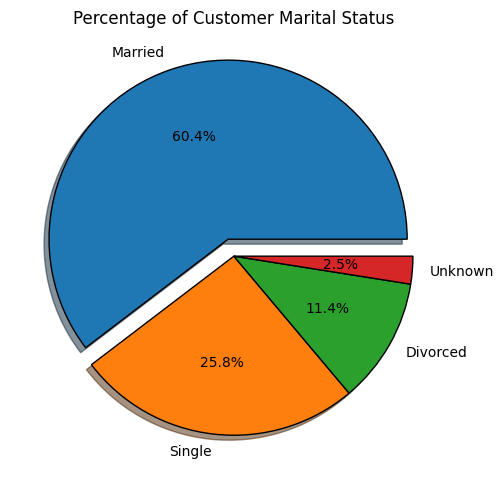

In [15]:
import matplotlib.pyplot as plt

# Підрахунок кількості користувачів у кожній категорії
married = df[df['marital'] == 'married'].shape[0]
single = df[df['marital'] == 'single'].shape[0]
divorced = df[df['marital'] == 'divorced'].shape[0]
unknown = df[df['marital'] == 'unknown'].shape[0]

# Параметри для кругової діаграми
plt.rcParams["figure.figsize"] = (7,5)
slices = [married, single, divorced, unknown]
labels = ['Married', 'Single', 'Divorced', 'Unknown']
explode = [0.1, 0, 0, 0]  # Вказуємо по 1 значенню для кожної категорії

# Побудова кругової діаграми
plt.pie(slices, labels=labels, explode=explode, wedgeprops={'edgecolor':'black'}, shadow=True, autopct='%1.1f%%')
plt.title("Percentage of Customer Marital Status")
plt.tight_layout()
plt.show()


# Огляд даних #

In [16]:
df.head()

,Unnamed: 0.1,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,0.0,30.0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79.0,1.0,-1,0.0,unknown,no
1,1,1.0,33.0,services,married,secondary,no,4789,yes,yes,cellular,11,may,220.0,1.0,339,4.0,failure,no
2,2,2.0,35.0,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185.0,1.0,330,1.0,failure,no
3,3,3.0,30.0,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199.0,4.0,-1,0.0,unknown,no
4,4,4.0,59.0,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226.0,1.0,-1,0.0,unknown,no


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  4521 non-null   int64  
 1   Unnamed: 0    4069 non-null   float64
 2   age           4205 non-null   float64
 3   job           4408 non-null   object 
 4   marital       4521 non-null   object 
 5   education     3991 non-null   object 
 6   default       4205 non-null   object 
 7   balance       4521 non-null   int64  
 8   housing       4069 non-null   object 
 9   loan          4295 non-null   object 
 10  contact       4408 non-null   object 
 11  day           4521 non-null   int64  
 12  month         4521 non-null   object 
 13  duration      3969 non-null   float64
 14  campaign      4408 non-null   float64
 15  pdays         4521 non-null   int64  
 16  previous      4408 non-null   float64
 17  poutcome      4521 non-null   object 
 18  y             4295 non-null 

## Огляд статистичних характеристик ##

In [18]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4069.000000,4205.000000,4521.000000,4521.000000,3969.000000,4408.000000,4521.000000,4408.000000
mean,2260.000000,2266.195625,41.158145,1422.657819,15.915284,266.369615,2.796733,39.766645,0.541515
std,1305.244613,1307.102196,10.556222,3009.638142,8.247667,262.662584,3.120450,100.121124,1.700812
min,0.000000,0.000000,19.000000,-3313.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,1130.000000,1140.000000,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2260.000000,2263.000000,39.000000,444.000000,16.000000,187.000000,2.000000,-1.000000,0.000000
75%,3390.000000,3405.000000,48.000000,1480.000000,21.000000,333.000000,3.000000,-1.000000,0.000000
max,4520.000000,4520.000000,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## Очищення даних ##

In [19]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

# Перевірка на пропущені значення #

In [20]:
print(df.isnull().sum())

age          316
job          113
marital        0
education    530
default      316
balance        0
housing      452
loan         226
contact      113
day            0
month          0
duration     552
campaign     113
pdays          0
previous     113
poutcome       0
y            226
dtype: int64


## Візуалізація даних ##

# Аналіз даних клієнтів по віку #

## Графік для розподілу клієнтів по віку ##

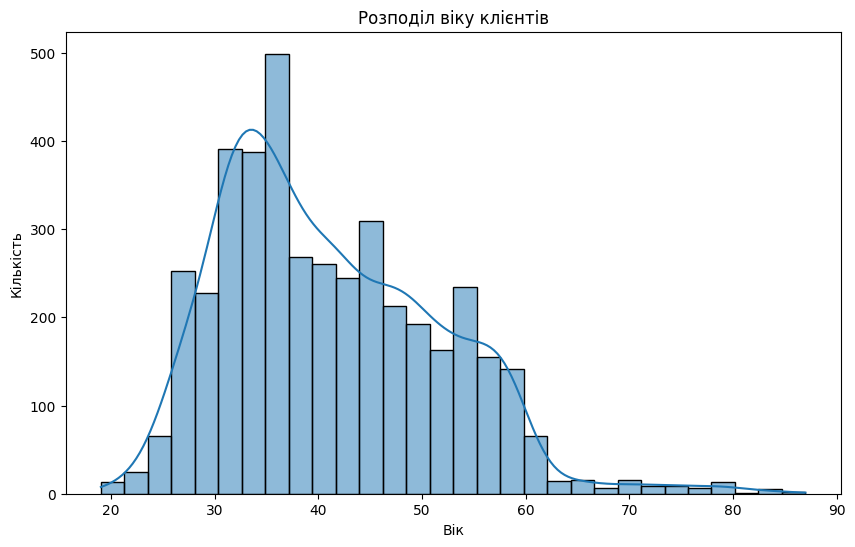

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Розподіл віку клієнтів')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.show()


## Графік для розподілу клієнтів по вікових категоріях ##

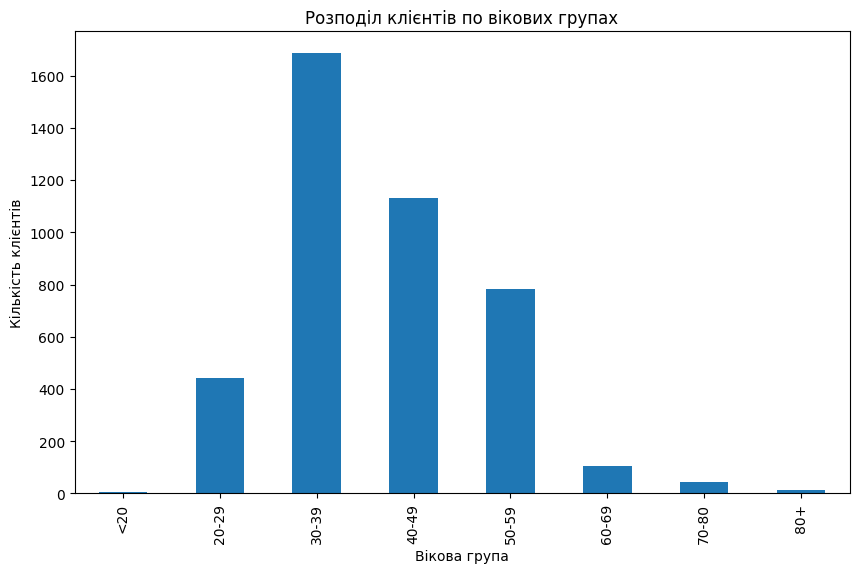

In [26]:
import matplotlib.pyplot as plt

# Гістограма розподілу вікових груп
plt.figure(figsize=(10, 6))
df['age_group'].value_counts().sort_index().plot(kind='bar')
plt.title('Розподіл клієнтів по вікових групах')
plt.xlabel('Вікова група')
plt.ylabel('Кількість клієнтів')
plt.show()


## Графік реакції на капмпанії за віковими групами ##

<Figure size 1200x800 with 0 Axes>

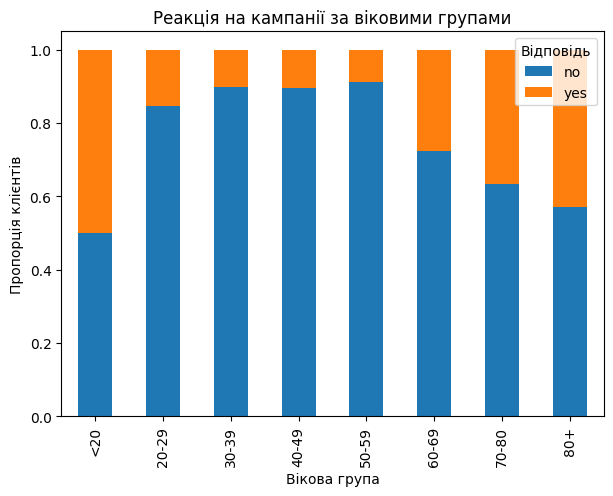

In [25]:
# Порівняння реакцій по вікових групах
plt.figure(figsize=(12, 8))
age_response_distribution.plot(kind='bar', stacked=True)
plt.title('Реакція на кампанії за віковими групами')
plt.xlabel('Вікова група')
plt.ylabel('Пропорція клієнтів')
plt.legend(title='Відповідь')
plt.show()


In [24]:
# Визначення вікових груп
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-80', '80+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
# Розподіл клієнтів по вікових групах
age_distribution = df['age_group'].value_counts()
print("Розподіл клієнтів по вікових групах:")
print(age_distribution)

# Розподіл відповідей на кампанії по вікових групах
age_response_distribution = df.groupby('age_group')['y'].value_counts(normalize=True).unstack().fillna(0)
print("\nРозподіл відповідей на кампанії по вікових групах:")
print(age_response_distribution)



Розподіл клієнтів по вікових групах:
age_group
30-39    1685
40-49    1130
50-59     783
20-29     441
60-69     105
70-80      43
80+        14
<20         4
Name: count, dtype: int64

Розподіл відповідей на кампанії по вікових групах:
y                no       yes
age_group                    
<20        0.500000  0.500000
20-29      0.846523  0.153477
30-39      0.898189  0.101811
40-49      0.896744  0.103256
50-59      0.910931  0.089069
60-69      0.724490  0.275510
70-80      0.634146  0.365854
80+        0.571429  0.428571


# Висновки #
**1.** Більша частка клієнтів це люди Віком 30-39 років.\
**2.** Найбільше на маркетингові кампанії реагують люди віком <20 років та 60+ років.

# Аналіз даних клієнтів по фінансах(кредити, баланс і т.д.) #

In [27]:
import warnings
warnings.simplefilter('ignore')

# Завантажте дані
df = pd.read_csv('variant_6.csv')

# Визначення категорій для балансу
bins = [-float('inf'), 0, 1000, 5000, float('inf')]
labels = ['Negative', 'Low', 'Medium', 'High']
df['balance_category'] = pd.cut(df['balance'], bins=bins, labels=labels)

# Обчислення ймовірності позитивної реакції для кожної категорії
balance_response = df.groupby('balance_category')['y'].value_counts(normalize=True).unstack(fill_value=0)
balance_response['probability_yes'] = balance_response['yes']
balance_response = balance_response[['probability_yes']]
balance_response = balance_response.sort_values(by='probability_yes', ascending=False)

print("Ймовірність позитивної реакції за категоріями балансу:")
print(balance_response)


Ймовірність позитивної реакції за категоріями балансу:
y                 probability_yes
balance_category                 
Medium                   0.161261
High                     0.111864
Low                      0.102041
Negative                 0.084672


In [28]:
# Обчислення ймовірності позитивної реакції для клієнтів з і без житлового кредиту
housing_response = df.groupby('housing')['y'].value_counts(normalize=True).unstack(fill_value=0)
housing_response['probability_yes'] = housing_response['yes']
housing_response = housing_response[['probability_yes']]
housing_response = housing_response.sort_values(by='probability_yes', ascending=False)

print("Ймовірність позитивної реакції за наявністю житлового кредиту:")
print(housing_response)

# Обчислення ймовірності позитивної реакції для клієнтів з і без споживчого кредиту
loan_response = df.groupby('loan')['y'].value_counts(normalize=True).unstack(fill_value=0)
loan_response['probability_yes'] = loan_response['yes']
loan_response = loan_response[['probability_yes']]
loan_response = loan_response.sort_values(by='probability_yes', ascending=False)

print("Ймовірність позитивної реакції за наявністю споживчого кредиту:")
print(loan_response)


Ймовірність позитивної реакції за наявністю житлового кредиту:
y        probability_yes
housing                 
no              0.160096
yes             0.086560
Ймовірність позитивної реакції за наявністю споживчого кредиту:
y     probability_yes
loan                 
no           0.125584
yes          0.057927


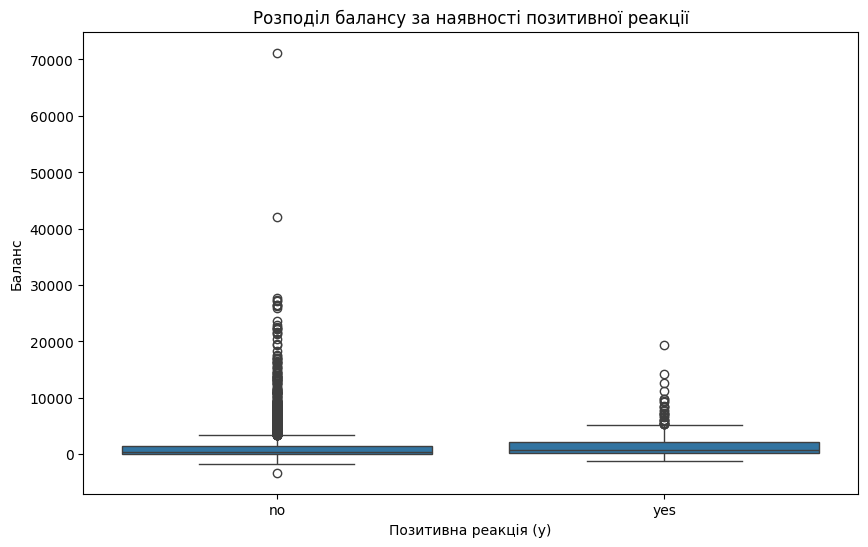

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=df)
plt.title('Розподіл балансу за наявності позитивної реакції')
plt.xlabel('Позитивна реакція (y)')
plt.ylabel('Баланс')
plt.show()


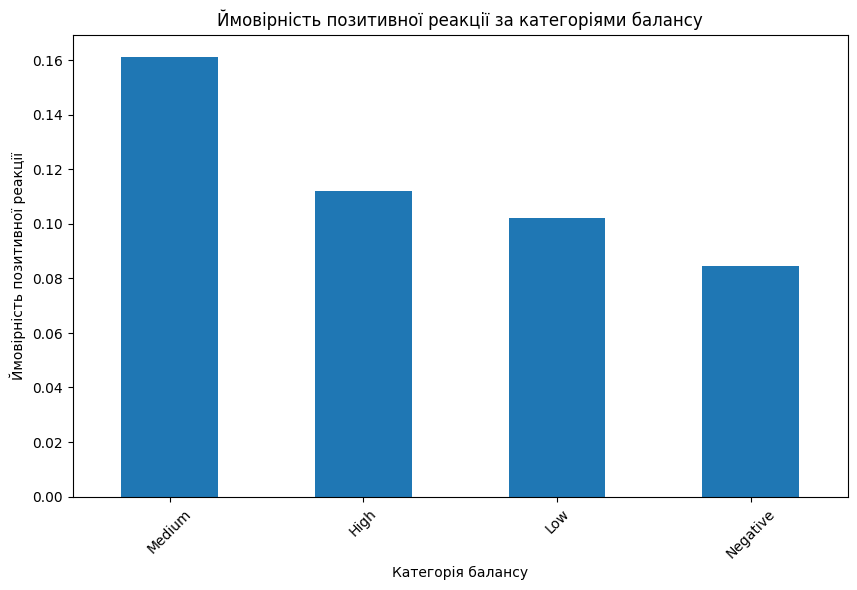

In [30]:
import matplotlib.pyplot as plt

# Візуалізація ймовірності позитивної реакції за категоріями балансу
plt.figure(figsize=(10, 6))
balance_response['probability_yes'].plot(kind='bar')
plt.title('Ймовірність позитивної реакції за категоріями балансу')
plt.xlabel('Категорія балансу')
plt.ylabel('Ймовірність позитивної реакції')
plt.xticks(rotation=45)
plt.show()



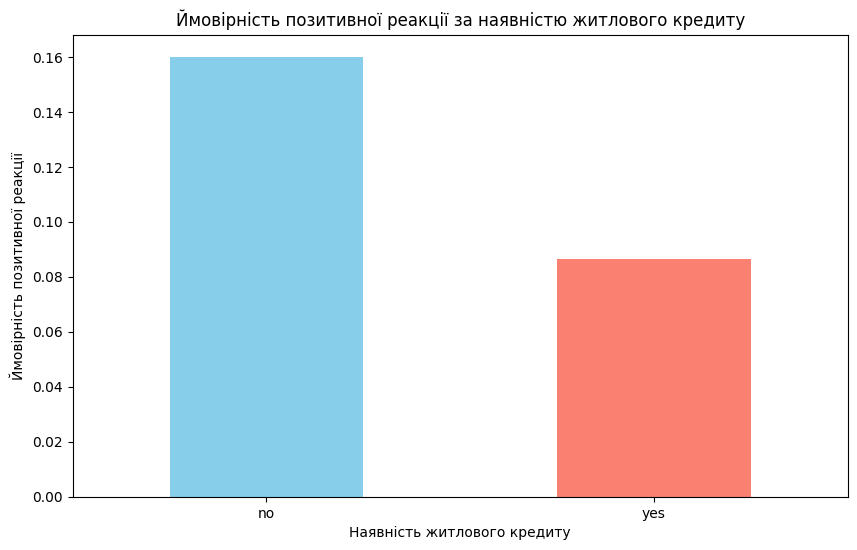

In [31]:
# Візуалізація ймовірності позитивної реакції за наявністю житлового кредиту
plt.figure(figsize=(10, 6))
housing_response['probability_yes'].plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Ймовірність позитивної реакції за наявністю житлового кредиту')
plt.xlabel('Наявність житлового кредиту')
plt.ylabel('Ймовірність позитивної реакції')
plt.xticks(rotation=0)
plt.show()



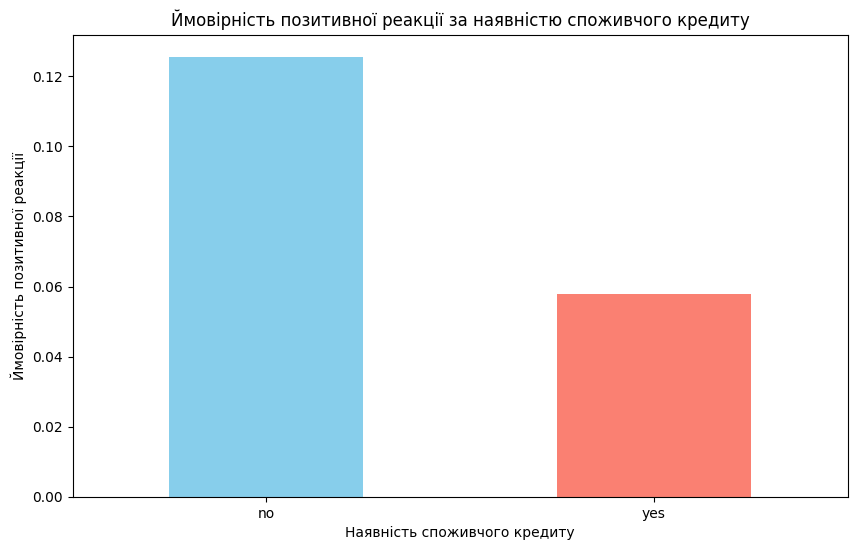

In [32]:
# Візуалізація ймовірності позитивної реакції за наявністю споживчого кредиту
plt.figure(figsize=(10, 6))
loan_response['probability_yes'].plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Ймовірність позитивної реакції за наявністю споживчого кредиту')
plt.xlabel('Наявність споживчого кредиту')
plt.ylabel('Ймовірність позитивної реакції')
plt.xticks(rotation=0)
plt.show()


## Висновки ##
**1.** Люди з відсутнім кредитом(житловим чи спожвичим) більш схильні до реакції на маркетингові кампанії.\
**2.** Люди з середнім балансом найбільш схильні до реакції на маркетингові кампанії.


# Аналіз позивтиної реакції за рівнем освіти #

In [33]:
# Групування за рівнем освіти і обчислення ймовірності позитивної реакції
education_response = df.groupby('education')['y'].value_counts(normalize=True).unstack(fill_value=0)
education_response['probability_yes'] = education_response['yes']
education_response = education_response[['probability_yes']]

print("Ймовірність позитивної реакції за рівнем освіти:")
print(education_response)


Ймовірність позитивної реакції за рівнем освіти:
y          probability_yes
education                 
primary           0.086149
secondary         0.107353
tertiary          0.137960
unknown           0.116564


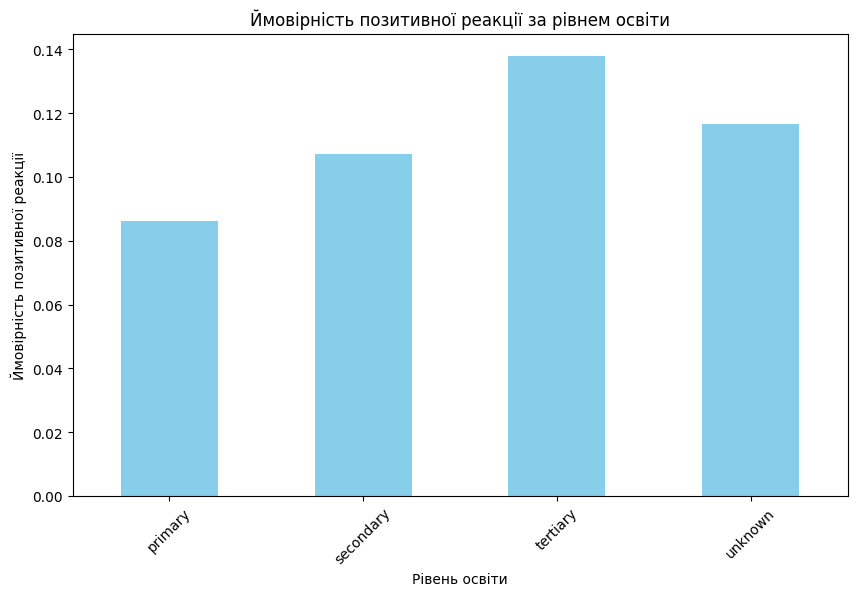

In [34]:
import matplotlib.pyplot as plt

# Візуалізація ймовірності позитивної реакції за рівнем освіти
plt.figure(figsize=(10, 6))
education_response['probability_yes'].plot(kind='bar', color='skyblue')
plt.title('Ймовірність позитивної реакції за рівнем освіти')
plt.xlabel('Рівень освіти')
plt.ylabel('Ймовірність позитивної реакції')
plt.xticks(rotation=45)
plt.show()


In [35]:
# Видалення рядків з пропущеними значеннями
df = df.dropna(subset=['education', 'y'])


In [36]:
from sklearn.preprocessing import LabelEncoder

# Перетворення рівня освіти в числові значення
label_encoder = LabelEncoder()
df['education_encoded'] = label_encoder.fit_transform(df['education'])

# Перевірка кореляції між закодованим рівнем освіти та позитивною реакцією
df['response_binary'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
correlation = df[['education_encoded', 'response_binary']].corr().iloc[0, 1]

print(f"Кореляція між рівнем освіти та позитивною реакцією: {correlation}")


Кореляція між рівнем освіти та позитивною реакцією: 0.04885455419641395


## Пояснення результатів ##
**Ймовірність позитивної реакції за рівнем освіти:** Клієнти з вищою освітою найбільше ймовірно відгукнуться на маркетингові компанії.\
**Кореляція:** Значення кореляції вкаже на силу та напрямок зв’язку між рівнем освіти та ймовірністю позитивної реакції. Значення близькі до 1 або -1 вказують на сильний зв’язок, тоді як значення близькі до 0 вказують на слабкий або відсутній зв’язок.

# Аналіз ефективності різних методів зв'язку з клієнтами #

In [37]:
# Групування за методом контакту і обчислення ймовірності позитивної реакції
contact_response = df.groupby('contact')['y'].value_counts(normalize=True).unstack(fill_value=0)
contact_response['probability_yes'] = contact_response['yes']
contact_response = contact_response[['probability_yes']]

print("Ймовірність позитивної реакції за методом контакту:")
print(contact_response)


Ймовірність позитивної реакції за методом контакту:
y          probability_yes
contact                   
cellular          0.141824
telephone         0.142308
unknown           0.045494


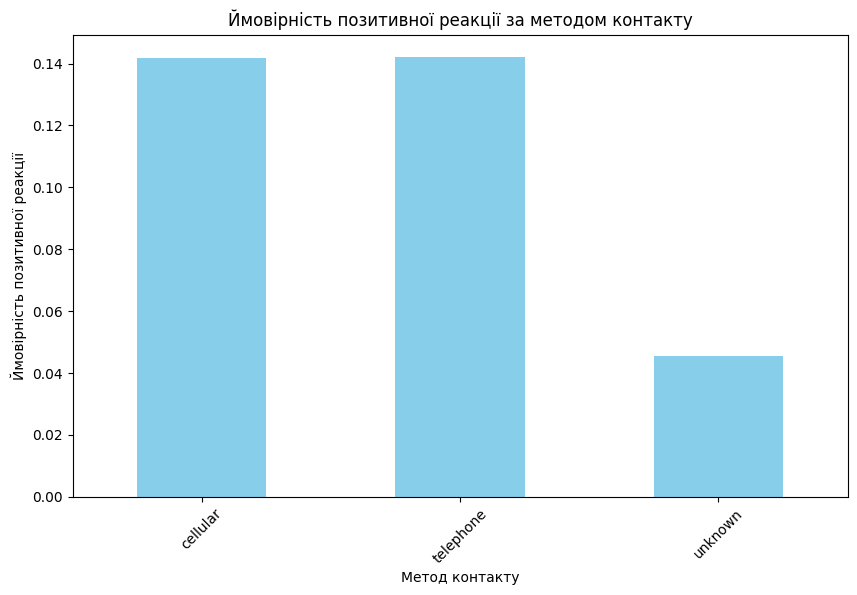

In [38]:
import matplotlib.pyplot as plt

# Візуалізація ймовірності позитивної реакції за методом контакту
plt.figure(figsize=(10, 6))
contact_response['probability_yes'].plot(kind='bar', color='skyblue')
plt.title('Ймовірність позитивної реакції за методом контакту')
plt.xlabel('Метод контакту')
plt.ylabel('Ймовірність позитивної реакції')
plt.xticks(rotation=45)
plt.show()


# Кореляційня матриця #

In [39]:
# Вибір тільки категоріальних стовпців
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

# Заповнення пропущених значень модою для категоріальних стовпців
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [40]:
# Вибір тільки числових стовпців
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Заповнення пропущених значень середнім значенням для числових стовпців
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


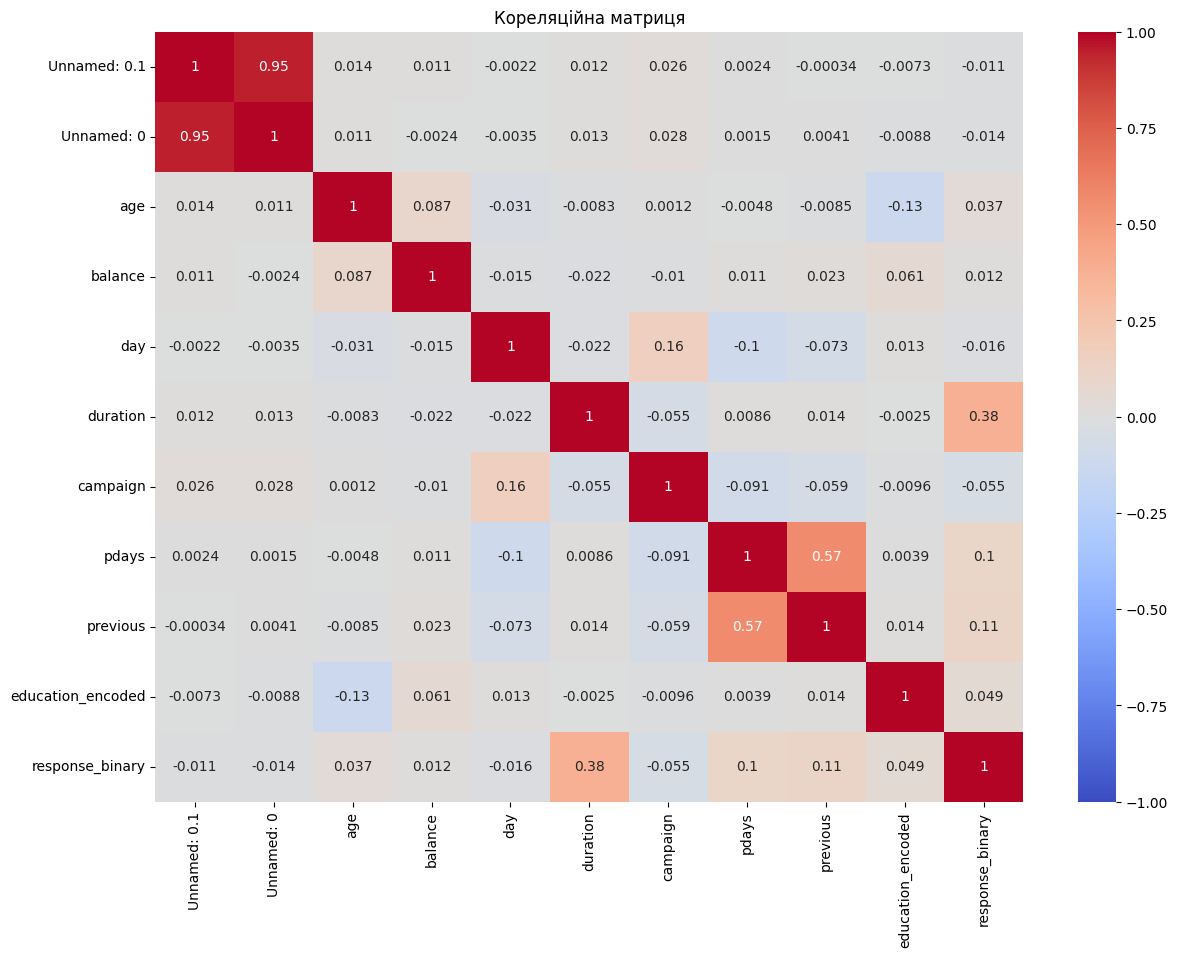

In [41]:
import numpy as np
import seaborn as sns
# Вибрати тільки числові колонки
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Побудова кореляційної матриці
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Кореляційна матриця')
plt.show()
